In [225]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
df_raw = pd.read_json("receitas.json")
df_raw

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [227]:
df_raw.shape

(20130, 11)

In [228]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [229]:
df_raw.describe(percentiles=[.1, .25, .5, .75, .8, .9, .99])

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
10%,1.000000e+00,1.070000e+02,1.000000,1.250000,1.400000e+01
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
80%,3.900000e+01,6.640000e+02,34.000000,4.375000,8.680000e+02
90%,6.000000e+01,9.400000e+02,52.000000,5.000000,1.384000e+03


In [230]:
df_raw.isnull().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [231]:
df = df_raw.dropna()

df = df.reset_index(drop=True)

df.shape

(10608, 11)

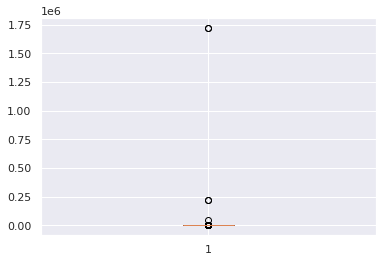

In [232]:
z = np.abs(stats.zscore(df['fat']))

outlier_rows = np.where(z > 3)

plt.boxplot(df['fat'])

plt.show()

df = df.drop(df.index[outlier_rows])

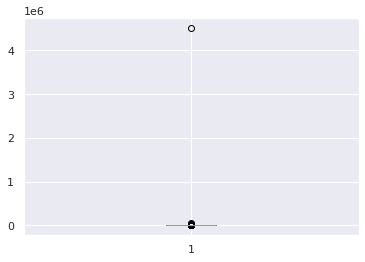

In [233]:
z = np.abs(stats.zscore(df['calories']))

outlier_rows = np.where(z > 3)

plt.boxplot(df['calories'])

plt.show()

df = df.drop(df.index[outlier_rows])

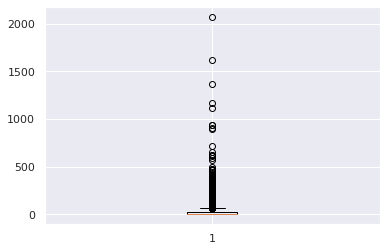

In [234]:
z = np.abs(stats.zscore(df['protein']))

outlier_rows = np.where(z > 3)

plt.boxplot(df['protein'])

plt.show()

df = df.drop(df.index[outlier_rows])

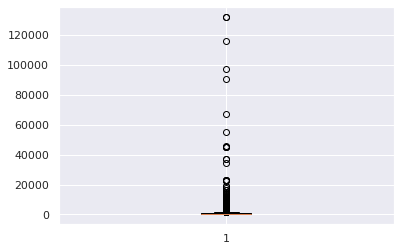

In [235]:
z = np.abs(stats.zscore(df['sodium']))

outlier_rows = np.where(z > 3)

plt.boxplot(df['sodium'])

plt.show()

df = df.drop(df.index[outlier_rows])

##EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc588dcf0a0>,
      dtype=object)

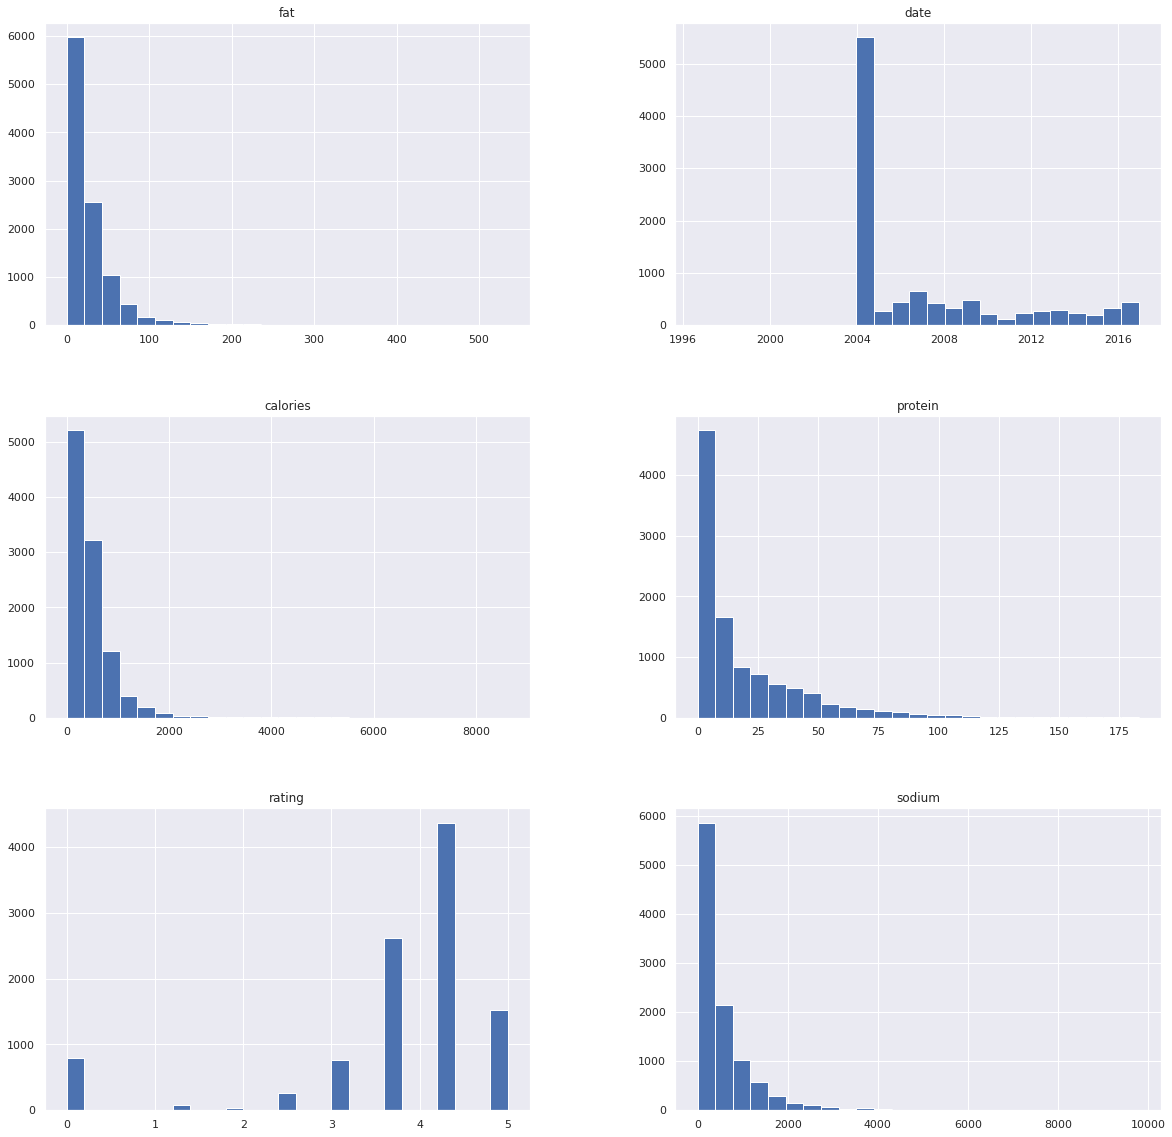

In [236]:
df.hist(bins=25,figsize=(20,20))

Inicialmente é possivel perceber que a grande maioria das receitas foram publicadas no ano de 2004, seguida por uma vertiginosa queda nos anos seguintes.

No que tange as variáveis nutricionais a quantidade de "fat","protein","sodium" e "calories" é inversamente propocional a quantidade de receitas. Focando-se no primeiro percentil.

A grande maioria das avaliações se concentram entre 3.5 e 4.5.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


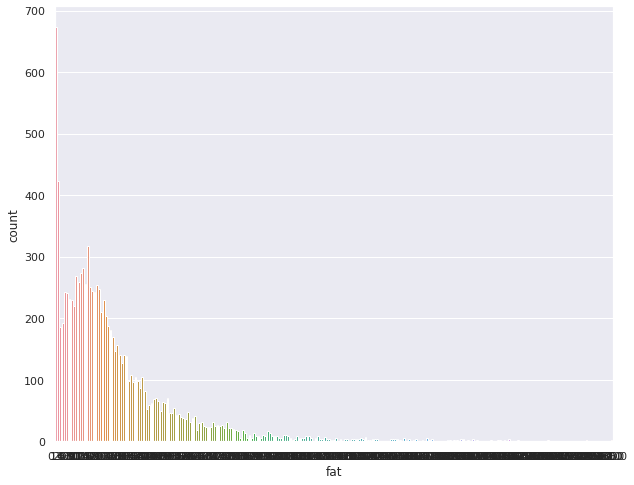

In [237]:
plt.figure(figsize=(10, 8))
sns.countplot(df['fat'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


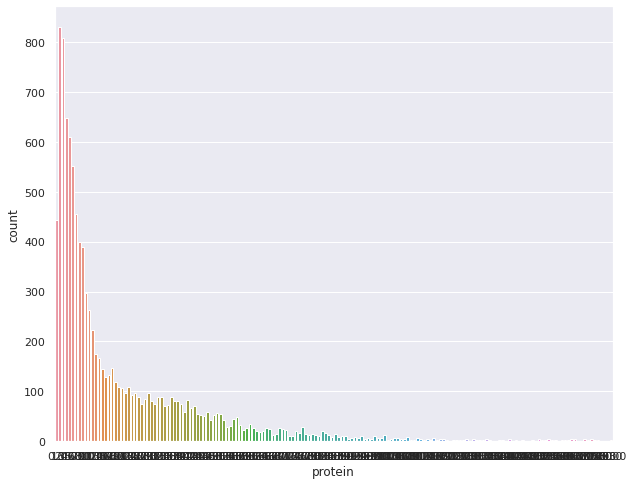

In [238]:
plt.figure(figsize=(10, 8))
sns.countplot(df['protein'])

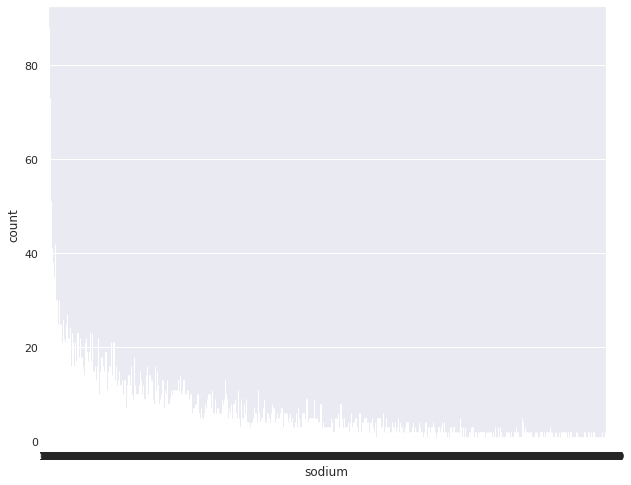

In [242]:
plt.figure(figsize=(10, 8))
sns.countplot(df['sodium'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


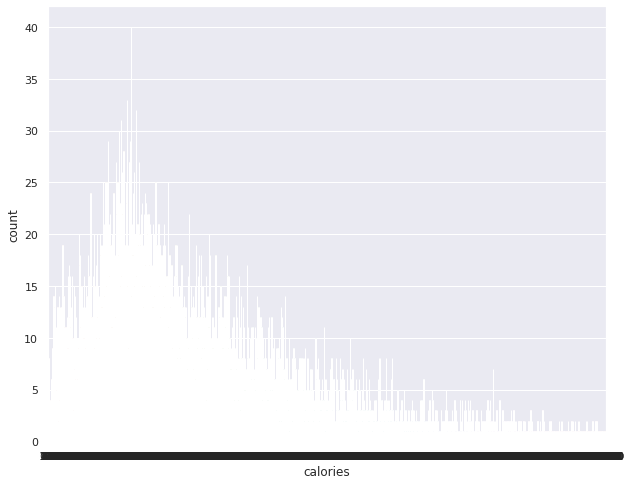

In [215]:
plt.figure(figsize=(10, 8))
sns.countplot(df['calories'])

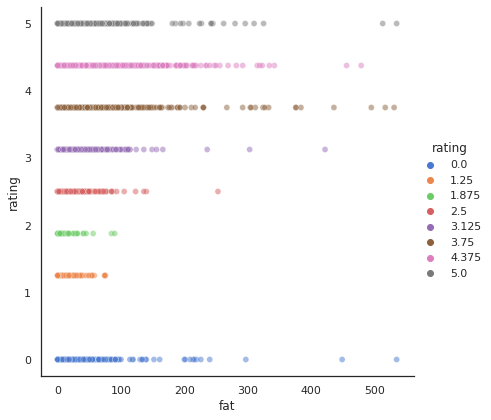

In [216]:
sns.set_theme(style="white")

sns.relplot(x="fat", y="rating", hue="rating", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=df)

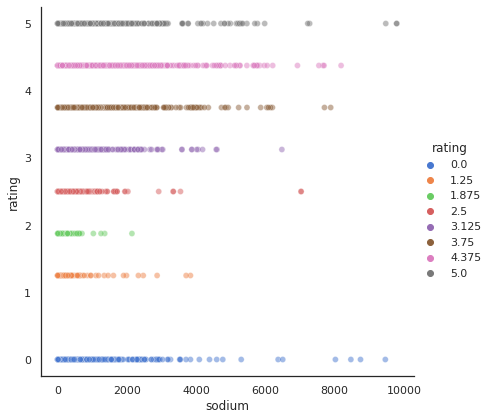

In [217]:
sns.set_theme(style="white")

sns.relplot(x="sodium", y="rating", hue="rating", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=df)

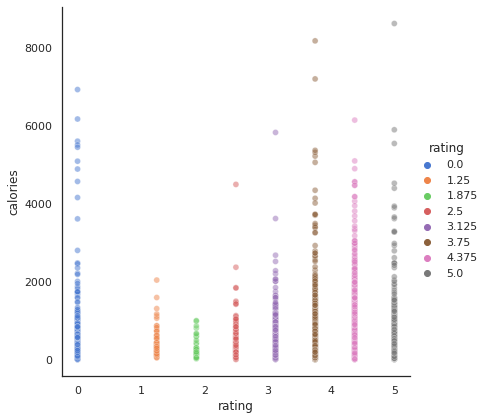

In [218]:
sns.set_theme(style="white")

sns.relplot(x="rating", y="calories", hue="rating", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=df)

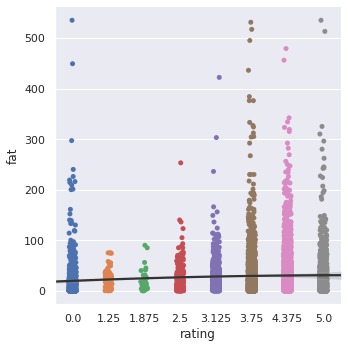

In [219]:
sns.set_theme()

sns.catplot(data=df, x="rating", y="fat", hue="rating", zorder=1)

sns.regplot(data=df, x="rating", y="fat", scatter=False, truncate=False, order=2, color=".2")

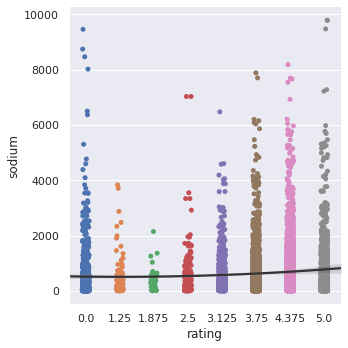

In [220]:
sns.catplot(data=df, x="rating", y="sodium", hue="rating", zorder=1)

sns.regplot(data=df, x="rating", y="sodium", scatter=False, truncate=False, order=2, color=".2")

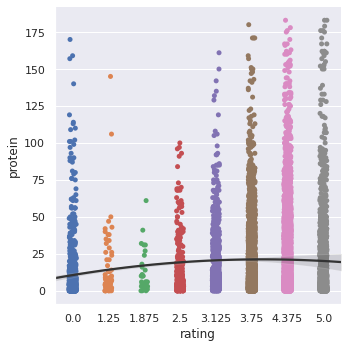

In [221]:
sns.catplot(data=df, x="rating", y="protein", hue="rating", zorder=1)

sns.regplot(data=df, x="rating", y="protein", scatter=False, truncate=False, order=2, color=".2")

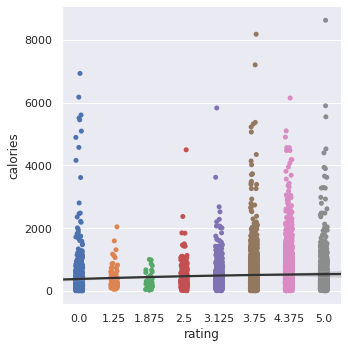

In [222]:
sns.catplot(data=df, x="rating", y="calories", hue="rating", zorder=1)

sns.regplot(data=df, x="rating", y="calories", scatter=False, truncate=False, order=2, color=".2")

Aqui podemos perceber que nas variáveis nutricionais reunem as melhores avaliações também no primeiro quartil. Não havendo uma correlação direta entre a quantidade de gorduras, calorias, sódio ou proteínas e uma maior aceitação da receita.

In [223]:
correlacao=df.corr()

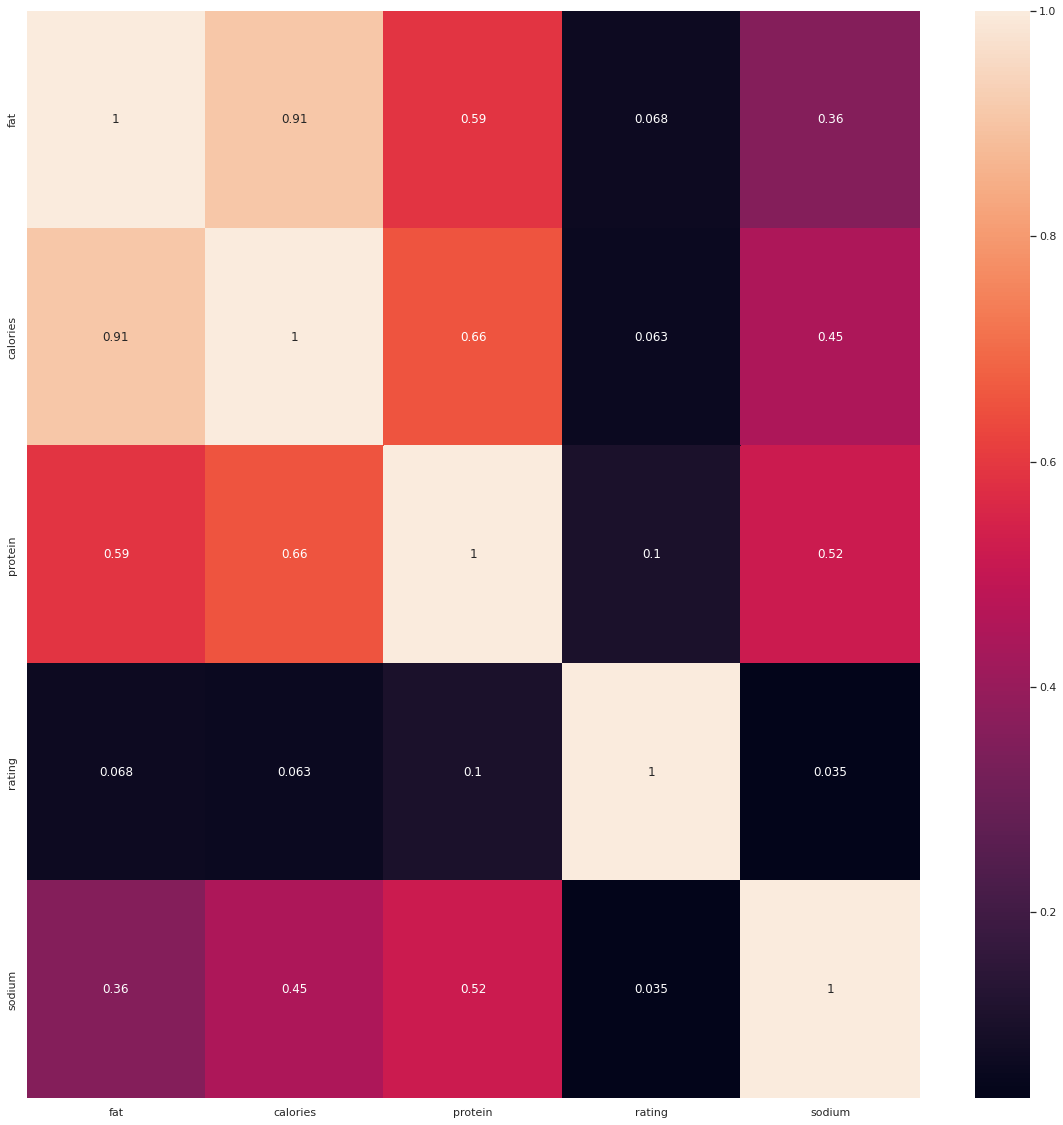

In [224]:
plt.figure(figsize=(20,20))
sns.heatmap(correlacao,annot=True)